In [5]:
# Import Electricity Map utilities
from utils import *

# Enable inline plotting
%matplotlib inline 
import matplotlib.pyplot as plt

In [6]:
df = get_state(['BE', 'DK', 'FR', 'HU'], '2017-02-01', '2017-02-13', 60)

In [7]:
df['hourofday'] = df['timestamp'].apply(lambda x: arrow.get(x).floor('hour').format('HH'))
df.head()

,co2intensity,country,timestamp,hourofday
0,232.379883,BE,2017-02-01 00:00:00+00:00,00
0,387.713815,DK,2017-02-01 00:00:00+00:00,00
0,81.543961,FR,2017-01-31 23:45:00+00:00,23
0,313.860716,HU,2017-02-01 00:00:00+00:00,00
0,231.419234,BE,2017-02-01 01:00:00+00:00,01


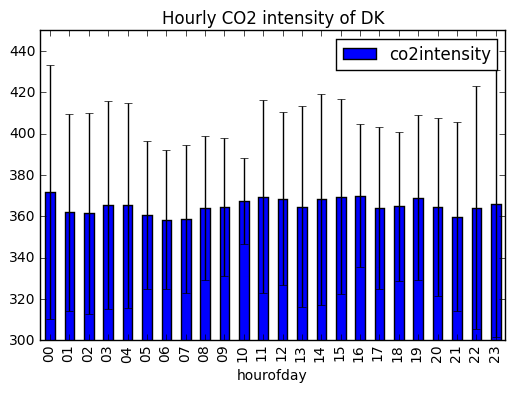

In [15]:
ctr = 'DK'
means = df[df['country'] == ctr].groupby(['hourofday']).mean()
errs = df[df['country'] == ctr].groupby(['hourofday']).std()
means.plot.bar(yerr=errs)
ax = plt.gca()
ax.set_ylim([300, 450])
ax.set_title('Hourly CO2 intensity of %s' % ctr)